# Séance 8 : Pendule

On s'intéresse à l'équation du pendule. La variable $\alpha$ régie par l'équation différentielle est l'angle du pendule avec la verticale. 
On exprime alors l'accélération angulaire comme 
\begin{equation*}
\alpha''(t) = - \gamma \alpha'(t) -  \sin(\alpha(t)) + a \cos(\omega_0 t).
\end{equation*}
Dans cette équation, $\gamma$ est un coefficient de frottement. Le terme $a \cos(\omega_0 t)$, correspond à un forçage d'intensité $a$ et de fréquence $\omega$.

## 1. Mise sous forme de système

On définit une nouvelle variable $u=\begin{pmatrix}x \\ y\end{pmatrix}$ définie à partir de $\alpha$ où $x(t)=\alpha(t)$ et $y(t)=\alpha'(t)$. L'équation du pendu se réécrit sous la forme du système
\begin{align*}
x'(t) & = y(t), \\
y'(t) & = - \gamma y(t) - \sin(x(t)) + a \cos(\omega_0 t).
\end{align*}
On a donc 
\begin{equation*}
f(t, u) = \begin{pmatrix} y \\ - \gamma y - \sin(x) + a \cos(\omega_0 t) \end{pmatrix}
\text{ et } 
\mathcal{J} f(t, u) = \begin{pmatrix} 0 & 1 \\ - \cos(x) & - \gamma \end{pmatrix}.
\end{equation*}

## 2. Pendule non amorti sans forçage

Dans le cas où $\gamma=0$ et $a=0$, l'équation se réduit à $\alpha''(t) = - \sin(\alpha(t))$.

### Etats d'équilibres

Un état d'équilibre est une solution $\alpha(t)=\alpha_e$ indépendante du temps et donc pour laquelle $\alpha'(t)=\alpha''(t)=0$. On a alors $\sin(\alpha_e)=0$, c'est-à-dire $\alpha_e=0$ ou $\alpha_e=\pi$. Pour l'écriture sous forme système, cela correspond à $(x_e,y_e)=(0,0)$ ou $(x_e,y_e)=(\pi,0)$. 

### Quantité conservée

Soit $\mathcal{E}(t) = \frac12 y^2(t) + 1 - \cos(x(t))$. On calcule
\begin{equation*}
\mathcal{E}'(t) = y(t)y'(y) + \sin(x(t)) x'(t)
= y(t) (- \sin(x(t))) + \sin(x(t)) y(t) = 0.
\end{equation*}
La quantité $\mathcal{E}(t)$ est donc conservée au cours du temps. C'est une quantité toujours positive qui vaut $\frac12 y^2(0) + 1 - \cos(x(0))$.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from math import pi, sin, cos
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def f0(u, gamma):
    return [u[1], - gamma * u[1] - np.sin(u[0])]

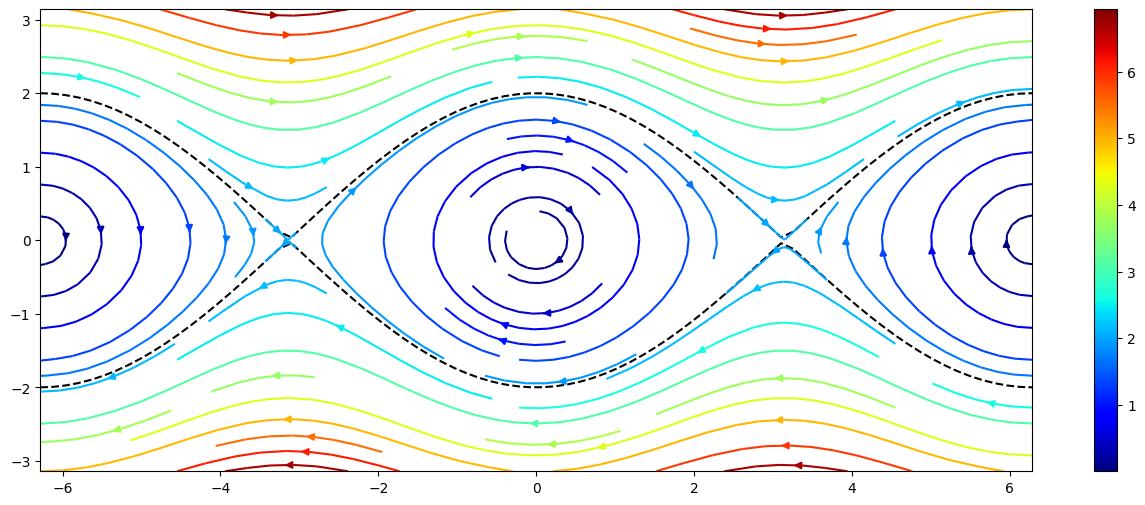

In [9]:
xmin, xmax = -2*pi, 2*pi
ymin, ymax = -pi, pi
# X et Y comme vecteurs
x = np.linspace(xmin, xmax, 80)
y = np.linspace(ymin, ymax, 40)
# X et Y comme matrices
X, Y = np.meshgrid(x, y)
cmap = plt.get_cmap('jet')
stream = f0([X, Y], 0)
E = Y*Y/2 + 1 - np.cos(X)

plt.figure(1,figsize=(16,6))
plt.plot(x,np.sqrt(2*(1+np.cos(x))),'k--')
plt.plot(x,-np.sqrt(2*(1+np.cos(x))),'k--')
phase = plt.streamplot(X, Y, stream[0], stream[1], color=E, cmap=cmap)
plt.colorbar(phase.lines);

On observe deux types de trajectoires :
* des trajectoires périodiques autour des points d'équilibre $(2k\pi,0)$ qui correspondent à des énergies $\mathcal{E}<2$ et une donnée initiale avec $x\in](2k-1)\pi,(2k+1)\pi[$.
* des trajectoires non périodiques pour lesquelles $\mathcal{E}>2$ et 
\begin{equation*}
y(t) \in [\sqrt{2\mathcal{E}-4},\sqrt{2\mathcal{E}}] 
\text{ et }
\lim_{t\to+\infty} x(t) = \operatorname{sign}(y) \infty.
\end{equation*}

La séparatrice correspond à l'énergie $\mathcal{E}=2$.

En les états stationnaires $(2k\pi,0)$, la jacobienne vaut
\begin{equation*}
\mathcal{J}f(2k\pi,0) = \begin{pmatrix} 0 & 1 \\ - 1 & 0 \end{pmatrix}.
\end{equation*}
Sa trace vaut $0$ et son déterminant $1$. On a affaire localement à un centre.

En les états stationnaires $((2k+1)\pi,0)$, la jacobienne vaut
\begin{equation*}
\mathcal{J}f((2k+1)\pi,0) = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}.
\end{equation*}
Sa trace vaut $0$ et son déterminant $-1$. On a affaire localement à un col.

## Pendule amorti

On calcule 
\begin{equation*}
\mathcal{E}'(t) = y(t)y'(y) + \sin(x(t)) x'(t)
= y(t) (-\gamma y(t) - \sin(x(t))) + \sin(x(t)) y(t) = - \gamma y^2(t).
\end{equation*}
La quantité $\mathcal{E}(t)$ est donc décroissante.

On prend maintenant $\gamma=0,5$.

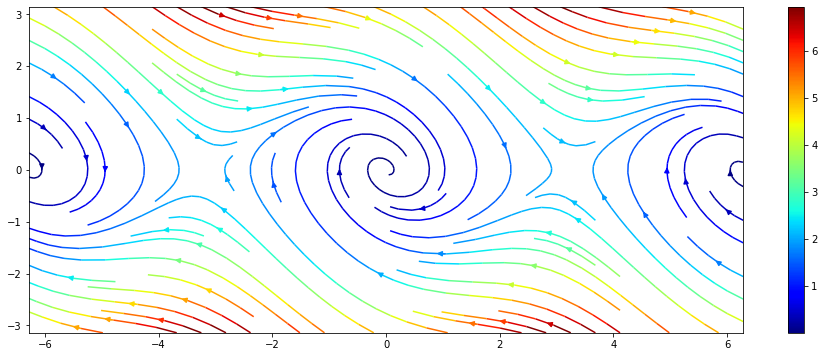

In [ ]:
stream = f0([X, Y], 0.5)
E = Y*Y/2 + 1 - np.cos(X)

plt.figure(1,figsize=(16,6))
phase = plt.streamplot(X, Y, stream[0], stream[1], color=E, cmap=cmap)
plt.colorbar(phase.lines);

Il est plus difficile de décire précisément les trajectoires. Les états d'équilibre sont inchangées. Il y a nouveau des séparatrices, mais il est plus difficile de trouver leur équation. Il est aussi difficile de caractériser le domaine d'attraction d'un état stationnaire. 

En les états stationnaires $(2k\pi,0)$, la jacobienne vaut
\begin{equation*}
\mathcal{J}f(2k\pi,0) = \begin{pmatrix} 0 & 1 \\ - 1 & -\gamma \end{pmatrix}.
\end{equation*}
La trace vaut $-\gamma$ et le déterminant $1$. Le discriminant correpondant est $\Delta=\gamma^2-4<0$. On est au dessus de la parabole et on a affaire localement à un foyer attractif.

Pour proposer un portrait de phase différent, il suffit d'avoir une trace suffisamment grande pour que $\Delta$ soit positif. On prend par exemple $\gamma=3$, ce qui donne $\Delta=5$. On s'attend à avoir un nœud attractif au voisinage des états stationnaires $(2k\pi,0)$.

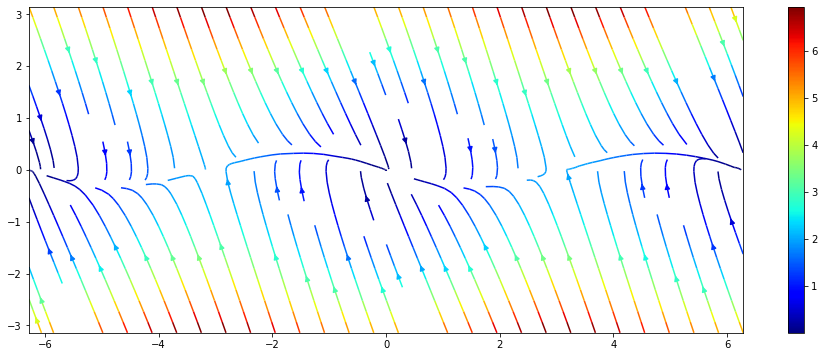

In [ ]:
stream = f0([X, Y], 3)
E = Y*Y/2 + 1 - np.cos(X)

plt.figure(1,figsize=(16,6))
phase = plt.streamplot(X, Y, stream[0], stream[1], color=E, cmap=cmap)
plt.colorbar(phase.lines);

## Pendule amorti avec forçage

In [ ]:
def f(t, u, gamma=0.5, a=0.9, omega=2/3):
    return [u[1], - gamma * u[1] - np.sin(u[0]) + a * np.cos(omega * t)]

In [ ]:
dt = .01
tmax = 30000
nmax = int(tmax/dt)
t = [dt*i for i in range(nmax)]
u1 = odeint(f, [0, 1.5], t, args=(0.5, 0.9, 2/3), tfirst='true')
u2 = odeint(f, [-2, 0], t, args=(0.5, 1.07, 2/3), tfirst='true')
u3 = odeint(f, [-2, 0], t, args=(0.5, 1.15, 2/3), tfirst='true')

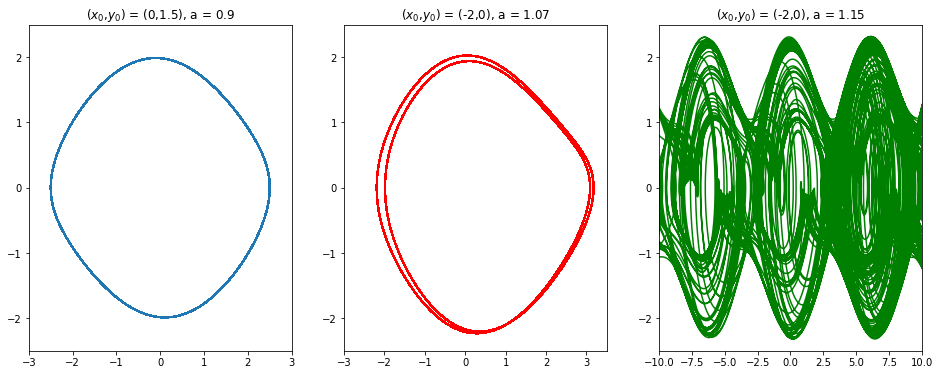

In [ ]:
plt.figure(1,figsize=(16,6))
plt.subplot(1,3,1)
plt.plot(u1[20000:,0], u1[20000:,1])
plt.xlim((-3,3))
plt.ylim((-2.5,2.5));
plt.title('($x_0$,$y_0$) = (0,1.5), a = 0.9')

plt.subplot(1,3,2)
plt.plot(u2[20000:,0], u2[20000:,1],'r')
plt.xlim((-3,3.5))
plt.ylim((-2.5,2.5));
plt.title('($x_0$,$y_0$) = (-2,0), a = 1.07')

plt.subplot(1,3,3)
plt.plot(u3[20000:,0], u3[20000:,1],'g')
plt.xlim((-10,10))
plt.ylim((-2.5,2.5))
plt.title('($x_0$,$y_0$) = (-2,0), a = 1.15');

#### Tracés avec $\mathcal{E}(t)$

In [ ]:
def E(u):
    return u[:,0]**2/2 + 1 - np.cos(u[:,1])
E1 = E(u1)
E2 = E(u2)
E3 = E(u3)

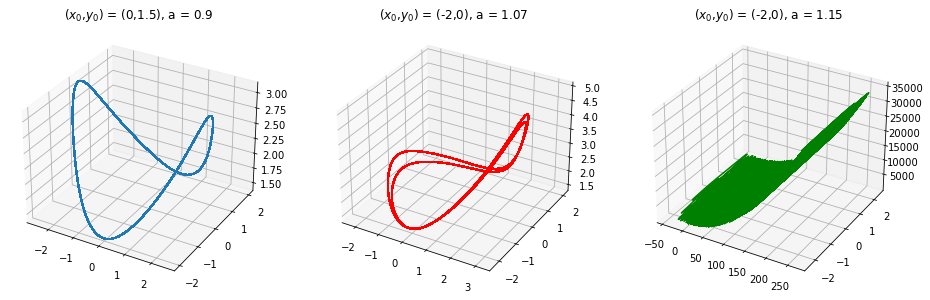

In [ ]:
plt.figure(1,figsize=(16,6))
plt.subplot(1,3,1, projection='3d')
plt.plot(u1[20000:,0], u1[20000:,1], E1[20000:])
plt.title('($x_0$,$y_0$) = (0,1.5), a = 0.9')

plt.subplot(1,3,2, projection='3d')
plt.plot(u2[20000:,0], u2[20000:,1], E2[20000:],'r')
plt.title('($x_0$,$y_0$) = (-2,0), a = 1.07')


plt.subplot(1,3,3, projection='3d')
plt.plot(u3[20000:,0], u3[20000:,1], E3[20000:],'g')
plt.title('($x_0$,$y_0$) = (-2,0), a = 1.15');